In [2]:
import pandas as pd
heart = pd.read_csv('heart.csv')

In [3]:
#데이터셋 10개 샘플 확인
#HeartDisease : 0/1 -> 심장병인지 아닌지 골라내는 문제
#0 음성 / 1 양성
heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
#누락된 데이터 확인
heart.info()
#누락된 데이터 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
heart.shape

(918, 12)

In [6]:
#통계 추출
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
#넘파이 배열
data = heart[['Age', 'RestingBP', 'Cholesterol','FastingBS', 'MaxHR','Oldpeak']].to_numpy()
target = heart['HeartDisease'].to_numpy()

In [8]:
#훈련 세트, 테스트 세트
#테스트 개수 270개
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=270)

In [9]:
#훈련 세트, 테스트 세트 크기 확인
print(train_input.shape, test_input.shape)

(648, 6) (270, 6)


In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
#로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

In [12]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7669753086419753
0.7518518518518519


-> 점수가 높지 않음! : 모델 과소적합 예상

In [13]:
print(lr.coef_, lr.intercept_)

[[ 0.01746369  0.1046115  -0.43598166  0.54473993 -0.79189772  1.04607653]] [0.40086258]


In [14]:
#결정 트리
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(train_scaled, train_target)
print(tree.score(train_scaled, train_target))#훈련
print(tree.score(test_scaled, test_target))#테스트

1.0
0.6962962962962963


훈련 세트 점수 1;;
테스트 성능은 훈련 세트보다 낮음 : 과대적합 모델

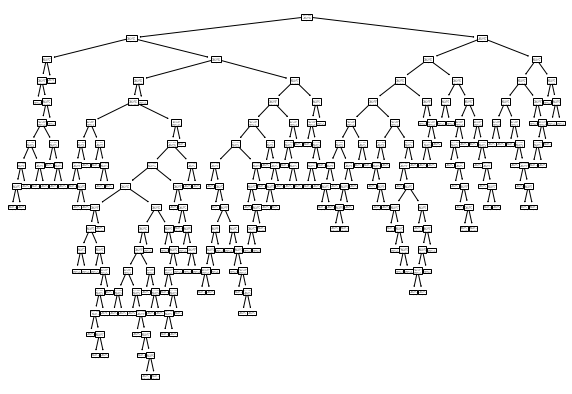

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(tree)
plt.show()

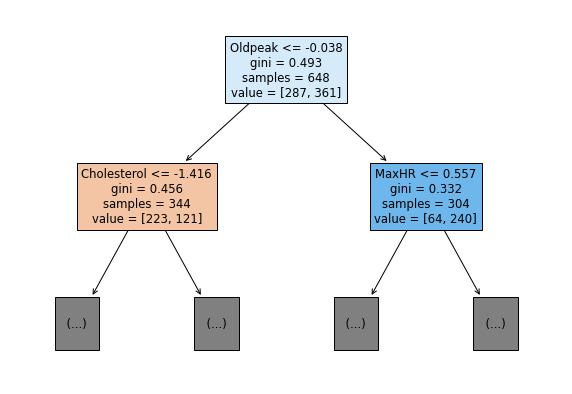

In [16]:
#트리 깊이 제한
plt.figure(figsize=(10,7))
plot_tree(tree, max_depth=1, filled=True, feature_names=['Age', 'RestingBP', 'Cholesterol','FastingBS', 'MaxHR','Oldpeak'])
plt.show()

설명 추가 예정
불순도 : 0.497

In [17]:
print(tree.feature_importances_)

[0.14013079 0.10095686 0.30578808 0.02302334 0.15938027 0.27072067]


In [18]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(train_input, train_target)
print(tree.score(train_input, train_target))
print(tree.score(test_input, test_target))

0.8132716049382716
0.7592592592592593


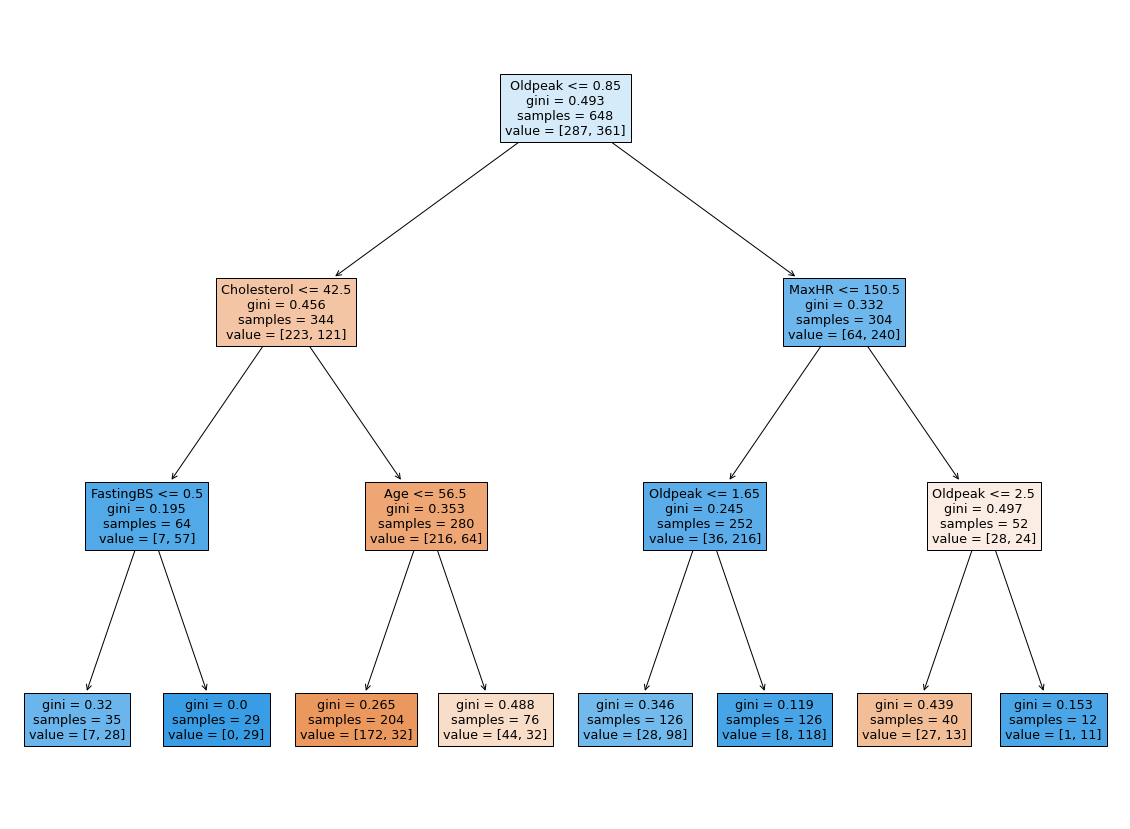

In [19]:
plt.figure(figsize=(20,15))
plot_tree(tree, filled=True, feature_names=['Age', 'RestingBP', 'Cholesterol','FastingBS', 'MaxHR','Oldpeak'])
plt.show()